##**Data**

In [109]:
from fiona import listlayers

ukInfoLink="https://github.com/UK-Data-Science/tarea_miningSpacialData/raw/main/ukMaps_27700.gpkg"

listlayers(ukInfoLink)

['country', 'cities', 'rivers', 'regions', 'centroid', 'airports']

In [110]:
import geopandas as gpd

country=gpd.read_file(ukInfoLink,layer='country')
cities=gpd.read_file(ukInfoLink,layer='cities')
airports=gpd.read_file(ukInfoLink,layer='airports')
#rivers=gpd.read_file(ukInfoLink,layer='rivers')
regions=gpd.read_file(ukInfoLink,layer='regions')

In [111]:
regions.rename(columns={'nuts118nm':'region'},inplace=True)

In [112]:
import pandas as pd

ukDataLink='https://github.com/UK-Data-Science/tarea_miningSpacialData/raw/main/uk_indicators.csv'
ukDis=pd.read_csv(ukDataLink)

ukDis = ukDis[ukDis.year==2021]
ukDis = ukDis[ukDis.iso_code.str.contains('GBR')].iloc[:12,:]

<ipython-input-112-cc503b43bc5d>:4: DtypeWarning: Columns (11,14,17,20,23,26,29,32) have mixed types. Specify dtype option on import or set low_memory=False.
  ukDis=pd.read_csv(ukDataLink)


In [113]:
ukDis.columns

Index(['iso_code', 'country', 'year', 'GDLCODE', 'level', 'region',
       'continent', 'sgdi', 'shdi', 'shdif', 'shdim', 'healthindex',
       'healthindexf', 'healthindexm', 'incindex', 'incindexf', 'incindexm',
       'edindex', 'edindexf', 'edindexm', 'esch', 'eschf', 'eschm', 'msch',
       'mschf', 'mschm', 'lifexp', 'lifexpf', 'lifexpm', 'gnic', 'gnicf',
       'gnicm', 'lgnic', 'lgnicf', 'lgnicm', 'pop'],
      dtype='object')

In [114]:
keep=['iso_code','region','shdi','healthindex','lifexp','year']
ukDis=ukDis.loc[:,keep]

In [115]:
objToNum=lambda x:pd.to_numeric(x)

ukDis['shdi']=ukDis.shdi.apply(objToNum)
ukDis['healthindex']=ukDis.healthindex.apply(objToNum)
ukDis['lifexp']=ukDis.lifexp.apply(objToNum)

ukDis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 19365 to 19376
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   iso_code     12 non-null     object 
 1   region       12 non-null     object 
 2   shdi         12 non-null     float64
 3   healthindex  12 non-null     float64
 4   lifexp       12 non-null     float64
 5   year         12 non-null     int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 672.0+ bytes


##Exercise 5

In [116]:
regions.merge(ukDis, left_on='region', right_on='region').shape

(6, 13)

In [117]:
capitalizeColumns=lambda x: x.upper().strip()

ukDis['region']=ukDis['region'].apply(capitalizeColumns)
regions['region']=regions['region'].apply(capitalizeColumns)

In [118]:
!pip install unidecode

In [119]:
import unidecode

byePunctuation=lambda x: unidecode.unidecode(x)
ukDis['region']=ukDis['region'].apply(byePunctuation)
regions['region']=regions['region'].apply(byePunctuation)

In [120]:
ukDis.region.duplicated().sum(),regions.region.duplicated().sum()

(0, 0)

In [121]:
!pip install thefuzz

In [122]:
from thefuzz import process
[(dis,process.extractOne(dis,ukDis.region)) for dis in sorted(regions.region)]

[('EAST MIDLANDS (ENGLAND)', ('EAST MIDLANDS', 90, 19368)),
 ('EAST OF ENGLAND', ('EAST OF ENGLAND', 100, 19370)),
 ('LONDON', ('LONDON', 100, 19371)),
 ('NORTH EAST (ENGLAND)', ('NORTH EAST', 90, 19365)),
 ('NORTH WEST (ENGLAND)', ('NORTH WEST', 90, 19366)),
 ('NORTHERN IRELAND', ('NORTHERN IRELAND', 100, 19376)),
 ('SCOTLAND', ('SCOTLAND', 100, 19375)),
 ('SOUTH EAST (ENGLAND)', ('SOUTH EAST', 90, 19372)),
 ('SOUTH WEST (ENGLAND)', ('SOUTH WEST', 90, 19373)),
 ('WALES', ('WALES', 100, 19374)),
 ('WEST MIDLANDS (ENGLAND)', ('WEST MIDLANDS', 90, 19369)),
 ('YORKSHIRE AND THE HUMBER', ('YORKSHIRE AND THE HUMBER', 100, 19367))]

In [123]:
changes_df={dis:process.extractOne(dis,ukDis.region)[0] for dis in sorted(regions.region)}
changes_df

{'EAST MIDLANDS (ENGLAND)': 'EAST MIDLANDS',
 'EAST OF ENGLAND': 'EAST OF ENGLAND',
 'LONDON': 'LONDON',
 'NORTH EAST (ENGLAND)': 'NORTH EAST',
 'NORTH WEST (ENGLAND)': 'NORTH WEST',
 'NORTHERN IRELAND': 'NORTHERN IRELAND',
 'SCOTLAND': 'SCOTLAND',
 'SOUTH EAST (ENGLAND)': 'SOUTH EAST',
 'SOUTH WEST (ENGLAND)': 'SOUTH WEST',
 'WALES': 'WALES',
 'WEST MIDLANDS (ENGLAND)': 'WEST MIDLANDS',
 'YORKSHIRE AND THE HUMBER': 'YORKSHIRE AND THE HUMBER'}

In [124]:
regions.replace({'region':changes_df},inplace=True)

In [125]:
datadisMap=regions.merge(ukDis, on='region')

datadisMap.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   nuts118cd    12 non-null     object  
 1   region       12 non-null     object  
 2   bng_e        12 non-null     int64   
 3   bng_n        12 non-null     int64   
 4   long         12 non-null     float64 
 5   lat          12 non-null     float64 
 6   GlobalID     12 non-null     object  
 7   geometry     12 non-null     geometry
 8   iso_code     12 non-null     object  
 9   shdi         12 non-null     float64 
 10  healthindex  12 non-null     float64 
 11  lifexp       12 non-null     float64 
 12  year         12 non-null     int64   
dtypes: float64(5), geometry(1), int64(3), object(4)
memory usage: 1.3+ KB


In [126]:
datadisMap

nuts118cd                    region   bng_e   bng_n      long        lat  \
0        UKC                NORTH EAST  417313  600358 -1.728900  55.297031   
1        UKD                NORTH WEST  350015  506280 -2.772370  54.449451   
2        UKE  YORKSHIRE AND THE HUMBER  446903  448736 -1.287120  53.932640   
3        UKF             EAST MIDLANDS  477660  322635 -0.849670  52.795719   
4        UKG             WEST MIDLANDS  386294  295477 -2.203580  52.556969   
5        UKH           EAST OF ENGLAND  571074  263229  0.504146  52.240669   
6        UKI                    LONDON  517516  178392 -0.308640  51.492271   
7        UKJ                SOUTH EAST  470062  172924 -0.993110  51.450970   
8        UKK                SOUTH WEST  285015  102567 -3.633430  50.811192   
9        UKL                     WALES  263406  242881 -3.994160  52.067410   
10       UKM                  SCOTLAND  277746  700060 -3.970910  56.177429   
11       UKN          NORTHERN IRELAND   86601  535325 -6.854810  54.614941   

                                GlobalID  \
0   cc82fe95-42f3-4da8-99db-1ce6d8216f81   
1   d68e52e6-2886-4fbf-826a-787245e4aeea   
2   b6d46527-b101-477c-90f3-b3c268c2c141   
3   941e33e8-f9d9-461d-8308-73cda75c2a0a   
4   cccb06b1-bbd2-45d9-9ad0-433d2521d2e6   
5   c89c720d-16b4-464b-b44c-2b7fb79e534a   
6   2a6f99a5-7cb6-48fa-91d7-760705353fa4   
7   c8861045-7eab-4d13-a071-cac4bcdc8936   
8   7d6bb435-5762-466b-be81-346a2cb31ea0   
9   cca3754b-eee7-4624-b9a0-29d69457af9e   
10  1bc0b37e-18aa-42a3-9717-237ca29b4f7f   
11  ce459d3f-b051-42ee-aa20-ae2613de2af9   

                                             geometry iso_code   shdi  \
0   MULTIPOLYGON (((398515.800 653060.200, 398253....      GBR  0.901   
1   MULTIPOLYGON (((357136.203 587050.898, 356572....      GBR  0.915   
2   MULTIPOLYGON (((479381.800 518245.500, 479975....      GBR  0.908   
3   MULTIPOLYGON (((512490.996 414654.696, 512679....      GBR  0.914   
4   POLYGON ((404258.203 368301.504, 406240.101 36...      GBR  0.913   
5   MULTIPOLYGON (((600563.482 346526.146, 600790....      GBR  0.917   
6   MULTIPOLYGON (((532540.503 200760.602, 534074....      GBR  0.973   
7   MULTIPOLYGON (((493459.103 253084.405, 493776....      GBR  0.942   
8   MULTIPOLYGON (((417496.201 243875.101, 418009....      GBR  0.925   
9   MULTIPOLYGON (((312926.600 385120.700, 312808....      GBR  0.898   
10  MULTIPOLYGON (((332697.757 566975.890, 332507....      GBR  0.921   
11  MULTIPOLYGON (((116507.572 603942.070, 116502....      GBR  0.896   

    healthindex  lifexp  year  
0         0.912  79.275  2021  
1         0.918  79.664  2021  
2         0.923  79.990  2021  
3         0.932  80.556  2021  
4         0.926  80.196  2021  
5         0.947  81.556  2021  
6         0.958  82.273  2021  
7         0.954  82.030  2021  
8         0.947  81.551  2021  
9         0.920  79.788  2021  
10        0.903  78.683  2021  
11        0.928  80.313  2021

In [131]:
bye=['nuts118cd', 'bng_e', 'bng_n','long','lat','GlobalID']
datadisMap.drop(columns=bye,inplace=True)

datadisMap = datadisMap.reindex(columns=['iso_code','region','shdi','healthindex','lifexp','year','geometry'])

datadisMap.head()

iso_code                    region   shdi  healthindex  lifexp  year  \
0      GBR                NORTH EAST  0.901        0.912  79.275  2021   
1      GBR                NORTH WEST  0.915        0.918  79.664  2021   
2      GBR  YORKSHIRE AND THE HUMBER  0.908        0.923  79.990  2021   
3      GBR             EAST MIDLANDS  0.914        0.932  80.556  2021   
4      GBR             WEST MIDLANDS  0.913        0.926  80.196  2021   

                                            geometry  
0  MULTIPOLYGON (((398515.800 653060.200, 398253....  
1  MULTIPOLYGON (((357136.203 587050.898, 356572....  
2  MULTIPOLYGON (((479381.800 518245.500, 479975....  
3  MULTIPOLYGON (((512490.996 414654.696, 512679....  
4  POLYGON ((404258.203 368301.504, 406240.101 36...

##Exercise 6

In [102]:
!pip install pysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 24.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [132]:
from libpysal.weights import Queen, Rook, KNN

w_rook = Rook.from_dataframe(datadisMap,use_index=False)

/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 11.
  W.__init__(self, neighbors, ids=ids, **kw)


In [133]:
w_rook.islands

[11]

In [134]:
w_queen = Queen.from_dataframe(datadisMap,use_index=False)

/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 11.
  W.__init__(self, neighbors, ids=ids, **kw)


In [135]:
w_queen.islands

[11]

In [136]:
datadisMap.iloc[w_queen.islands,:].explore()

In [137]:
w_knn8 = KNN.from_dataframe(datadisMap, k=8)

In [138]:
w_knn8.islands

[]

In [167]:
# capital in the GDF:
datadisMap[datadisMap.region.str.contains('LON')]

iso_code  region   shdi  healthindex  lifexp  year  \
6      GBR  LONDON  0.973        0.958  82.273  2021   

                                            geometry  
6  MULTIPOLYGON (((532540.503 200760.602, 534074....

In [168]:
# amount of neighbors of that district
len(w_rook.neighbors[6])

2

In [169]:
# details
datadisMap.iloc[w_rook.neighbors[6],]

iso_code           region   shdi  healthindex  lifexp  year  \
5      GBR  EAST OF ENGLAND  0.917        0.947  81.556  2021   
7      GBR       SOUTH EAST  0.942        0.954  82.030  2021   

                                            geometry  
5  MULTIPOLYGON (((600563.482 346526.146, 600790....  
7  MULTIPOLYGON (((493459.103 253084.405, 493776....

<Axes: >

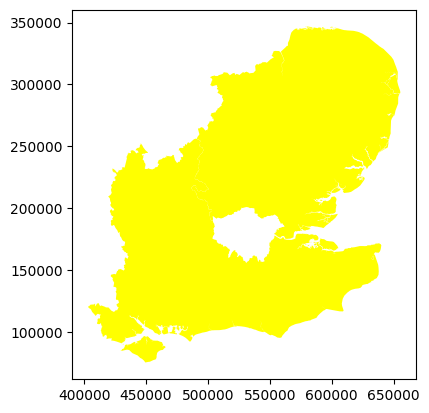

In [170]:
# see the neighbor
datadisMap.iloc[w_rook.neighbors[6] ,].plot(facecolor="yellow")

<Axes: >

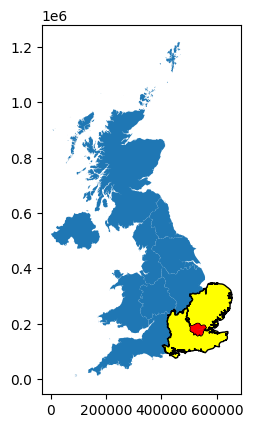

In [172]:
base=datadisMap.plot()
datadisMap.iloc[w_rook.neighbors[6] ,].plot(ax=base,facecolor="yellow",edgecolor='k')
datadisMap[datadisMap.region.str.contains('LON')].plot(ax=base,facecolor="red")

In [173]:
len(w_queen.neighbors[6])

2

In [174]:
datadisMap.iloc[w_queen.neighbors[6] ,]

iso_code           region   shdi  healthindex  lifexp  year  \
5      GBR  EAST OF ENGLAND  0.917        0.947  81.556  2021   
7      GBR       SOUTH EAST  0.942        0.954  82.030  2021   

                                            geometry  
5  MULTIPOLYGON (((600563.482 346526.146, 600790....  
7  MULTIPOLYGON (((493459.103 253084.405, 493776....

<Axes: >

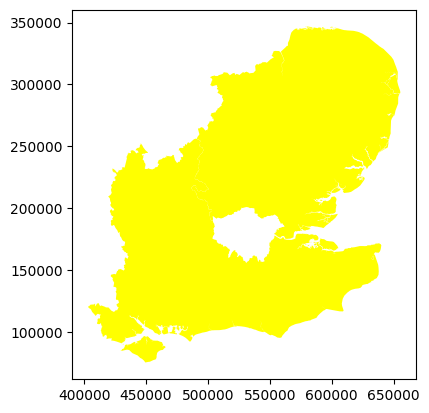

In [175]:
datadisMap.iloc[w_queen.neighbors[6] ,].plot(facecolor="yellow")

<Axes: >

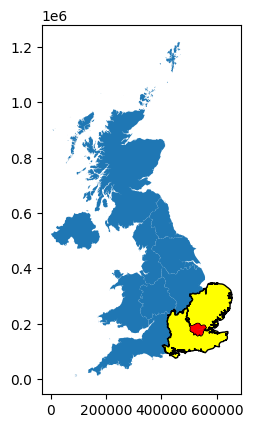

In [176]:
base=datadisMap.plot()
datadisMap.iloc[w_queen.neighbors[6] ,].plot(ax=base,facecolor="yellow",edgecolor='k')
datadisMap[datadisMap.region.str.contains('LON')].plot(ax=base,facecolor="red")

In [177]:
w_knn8.neighbors[6]

[7, 5, 3, 4, 8, 9, 2, 1]

<Axes: >

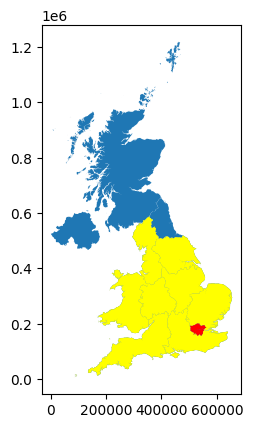

In [179]:
base=datadisMap.plot()
datadisMap.iloc[w_knn8.neighbors[6],].plot(ax=base,facecolor="yellow")
datadisMap[datadisMap.region.str.contains('LON')].plot(ax=base,facecolor="red")

<Axes: >

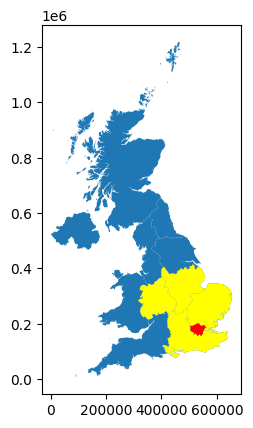

In [180]:
w_knn4 = KNN.from_dataframe(datadisMap, k=4)

base=datadisMap.plot()
datadisMap.iloc[w_knn4.neighbors[6],].plot(ax=base,facecolor="yellow")
datadisMap[datadisMap.region.str.contains('LON')].plot(ax=base,facecolor="red")

##Exercise 7

In [181]:
pd.DataFrame(*w_knn8.full())

0    1    2    3    4    5    6    7    8    9    10   11
0   0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0
1   1.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0
2   1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  0.0
3   1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  0.0
4   0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0
5   0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0
6   0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0
7   0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0
8   0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  0.0
9   0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0
10  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0
11  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0

In [182]:
# needed for spatial correlation
w_knn8.transform = 'R'

In [183]:
pd.DataFrame(*w_knn8.full()).head(12).sum(axis=1)

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
dtype: float64

In [185]:
from esda.moran import Moran

moranIDH = Moran(datadisMap['shdi'], w_knn8)
moranIDH.I,moranIDH.p_sim

(0.006203240330058304, 0.057)

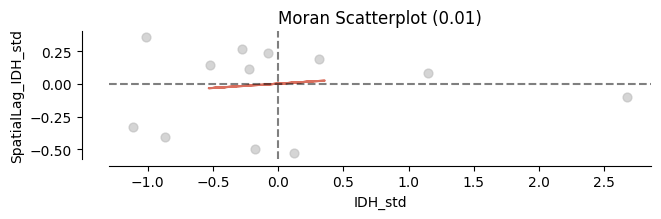

In [186]:
from splot.esda import moran_scatterplot

fig, ax = moran_scatterplot(moranIDH, aspect_equal=True)
ax.set_xlabel('IDH_std')
ax.set_ylabel('SpatialLag_IDH_std');

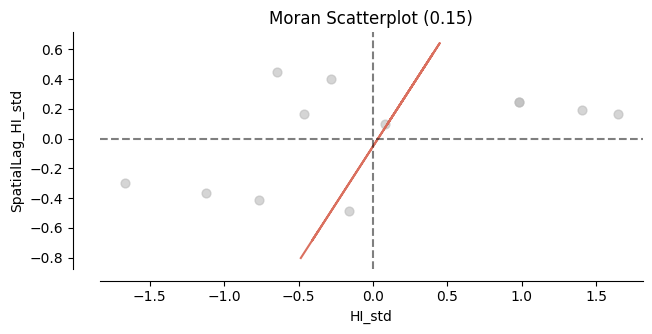

In [187]:
moranHI = Moran(datadisMap['healthindex'], w_knn8)

fig, ax = moran_scatterplot(moranHI, aspect_equal=True)
ax.set_xlabel('HI_std')
ax.set_ylabel('SpatialLag_HI_std');

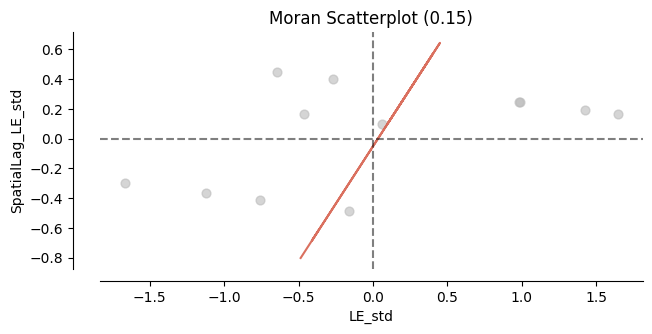

In [188]:
moranLE = Moran(datadisMap['lifexp'], w_knn8)

fig, ax = moran_scatterplot(moranLE, aspect_equal=True)
ax.set_xlabel('LE_std')
ax.set_ylabel('SpatialLag_LE_std');

##Exercise 8

In [197]:
from esda.moran import Moran_Local
lisaIDH = Moran_Local(y=datadisMap['shdi'], w=w_knn8,seed=2022)

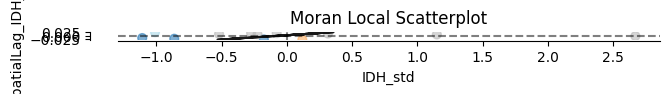

In [201]:
fig, ax = moran_scatterplot(lisaIDH,p=0.05)
ax.set_xlabel('IDH_std')
ax.set_ylabel('SpatialLag_IDH_std');

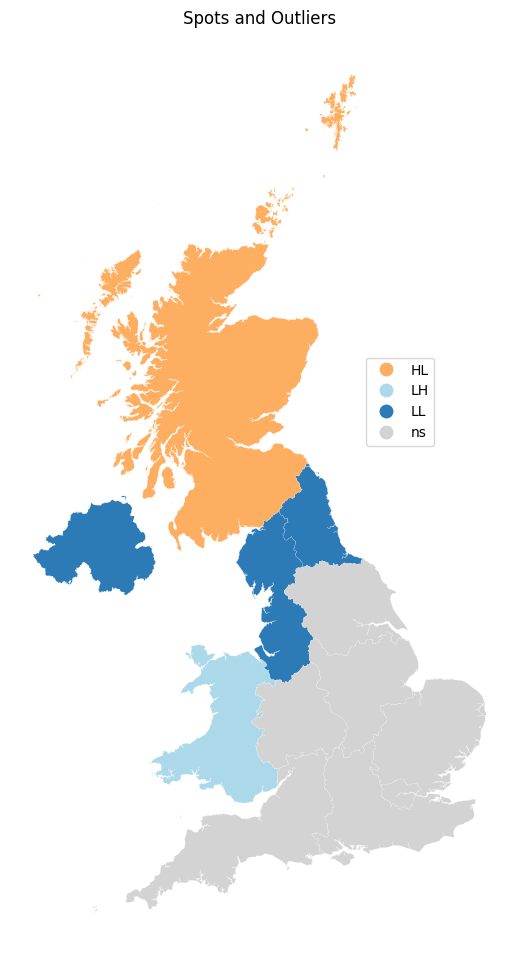

In [202]:
import matplotlib.pyplot as plt

from splot.esda import lisa_cluster
f, ax = plt.subplots(1, figsize=(12, 12))
plt.title('Spots and Outliers')
fig = lisa_cluster(lisaIDH,
                   datadisMap,ax=ax,
                   legend_kwds={'loc': 'center left',
                                'bbox_to_anchor': (0.7, 0.6)});
plt.show()

In [203]:
# quadrant, # significance
lisaIDH.q, lisaIDH.p_sim

(array([3, 3, 2, 2, 2, 2, 4, 1, 1, 2, 4, 3]),
 array([0.007, 0.006, 0.417, 0.431, 0.092, 0.097, 0.129, 0.125, 0.118,
        0.045, 0.001, 0.015]))

In [204]:
# quadrant: 1 HH,  2 LH,  3 LL,  4 HL
pd.Series(lisaIDH.q).value_counts()

2    5
3    3
4    2
1    2
Name: count, dtype: int64

In [205]:
datadisMap['IDH_quadrant']=[l if p <0.05 else 0 for l,p in zip(lisaIDH.q,lisaIDH.p_sim)  ]
datadisMap['IDH_quadrant'].value_counts()

IDH_quadrant
0    7
3    3
2    1
4    1
Name: count, dtype: int64

In [206]:
labels = [ '0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier']

datadisMap['IDH_quadrant_names']=[labels[i] for i in datadisMap['IDH_quadrant']]

datadisMap['IDH_quadrant_names'].value_counts()

IDH_quadrant_names
0 no_sig         7
3 coldSpot       3
2 coldOutlier    1
4 hotOutlier     1
Name: count, dtype: int64

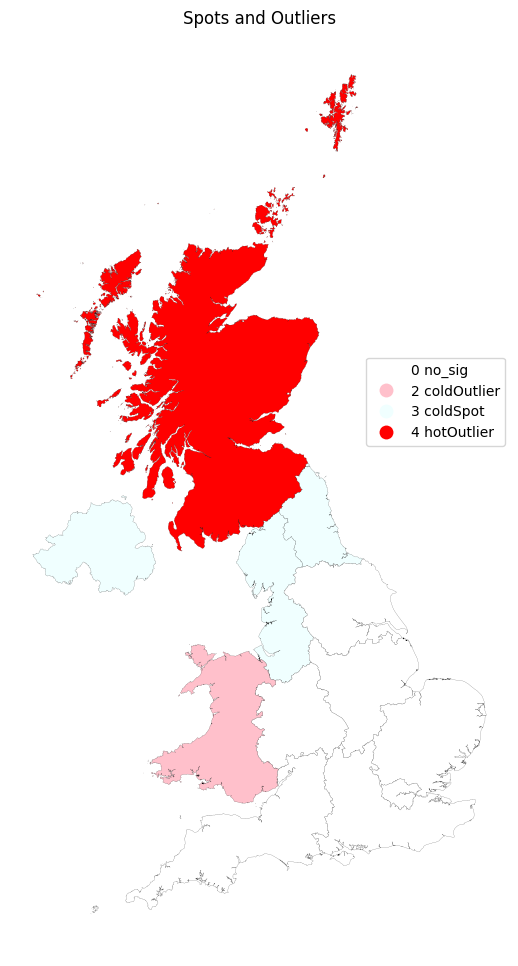

In [207]:
# custom colors
from matplotlib import colors
myColMap = colors.ListedColormap([ 'white', 'pink', 'cyan', 'azure','red'])

# Set up figure and ax
f, ax = plt.subplots(1, figsize=(12,12))
# Plot unique values choropleth including
# a legend and with no boundary lines

plt.title('Spots and Outliers')

datadisMap.plot(column='IDH_quadrant_names',
                categorical=True,
                cmap=myColMap,
                linewidth=0.1,
                edgecolor='k',
                legend=True,
                legend_kwds={'loc': 'center left',
                             'bbox_to_anchor': (0.7, 0.6)},
                ax=ax)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

In [209]:
lisaHI = Moran_Local(y=datadisMap['healthindex'], w=w_knn8,seed=2022)

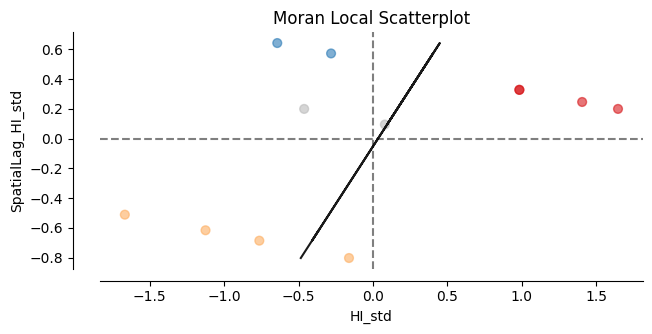

In [211]:
fig, ax = moran_scatterplot(lisaHI,p=0.05)
ax.set_xlabel('HI_std')
ax.set_ylabel('SpatialLag_HI_std');

In [212]:
lisaHI.q, lisaHI.p_sim

(array([3, 3, 2, 1, 2, 1, 1, 1, 1, 2, 3, 3]),
 array([0.009, 0.013, 0.298, 0.332, 0.025, 0.039, 0.039, 0.031, 0.039,
        0.022, 0.014, 0.014]))

In [213]:
pd.Series(lisaHI.q).value_counts()

1    5
3    4
2    3
Name: count, dtype: int64

In [214]:
datadisMap['HI_quadrant']=[l if p <0.05 else 0 for l,p in zip(lisaHI.q,lisaHI.p_sim)  ]
datadisMap['HI_quadrant'].value_counts()

HI_quadrant
3    4
1    4
0    2
2    2
Name: count, dtype: int64

In [215]:
labels = [ '0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier']

datadisMap['HI_quadrant_names']=[labels[i] for i in datadisMap['HI_quadrant']]

datadisMap['HI_quadrant_names'].value_counts()

HI_quadrant_names
3 coldSpot       4
1 hotSpot        4
0 no_sig         2
2 coldOutlier    2
Name: count, dtype: int64

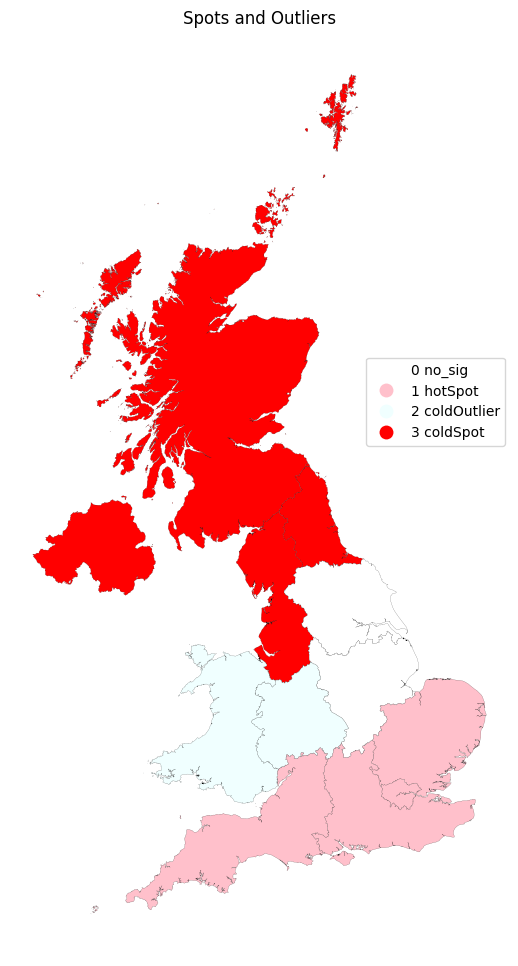

In [216]:
f, ax = plt.subplots(1, figsize=(12,12))

plt.title('Spots and Outliers')

datadisMap.plot(column='HI_quadrant_names',
                categorical=True,
                cmap=myColMap,
                linewidth=0.1,
                edgecolor='k',
                legend=True,
                legend_kwds={'loc': 'center left',
                             'bbox_to_anchor': (0.7, 0.6)},
                ax=ax)
ax.set_axis_off()
plt.show()

In [218]:
lisaLE = Moran_Local(y=datadisMap['lifexp'], w=w_knn8,seed=2022)

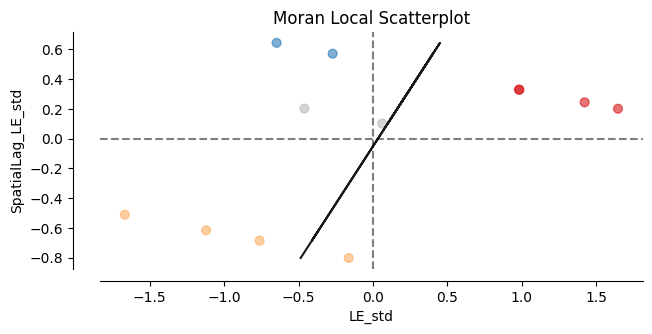

In [219]:
fig, ax = moran_scatterplot(lisaLE,p=0.05)
ax.set_xlabel('LE_std')
ax.set_ylabel('SpatialLag_LE_std');

In [220]:
lisaLE.q, lisaLE.p_sim

(array([3, 3, 2, 1, 2, 1, 1, 1, 1, 2, 3, 3]),
 array([0.013, 0.007, 0.3  , 0.329, 0.025, 0.037, 0.036, 0.034, 0.038,
        0.02 , 0.012, 0.007]))

In [221]:
pd.Series(lisaLE.q).value_counts()

1    5
3    4
2    3
Name: count, dtype: int64

In [222]:
datadisMap['LE_quadrant']=[l if p <0.05 else 0 for l,p in zip(lisaLE.q,lisaLE.p_sim)  ]
datadisMap['LE_quadrant'].value_counts()

LE_quadrant
3    4
1    4
0    2
2    2
Name: count, dtype: int64

In [223]:
labels = [ '0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier']

datadisMap['LE_quadrant_names']=[labels[i] for i in datadisMap['LE_quadrant']]

datadisMap['LE_quadrant_names'].value_counts()

LE_quadrant_names
3 coldSpot       4
1 hotSpot        4
0 no_sig         2
2 coldOutlier    2
Name: count, dtype: int64

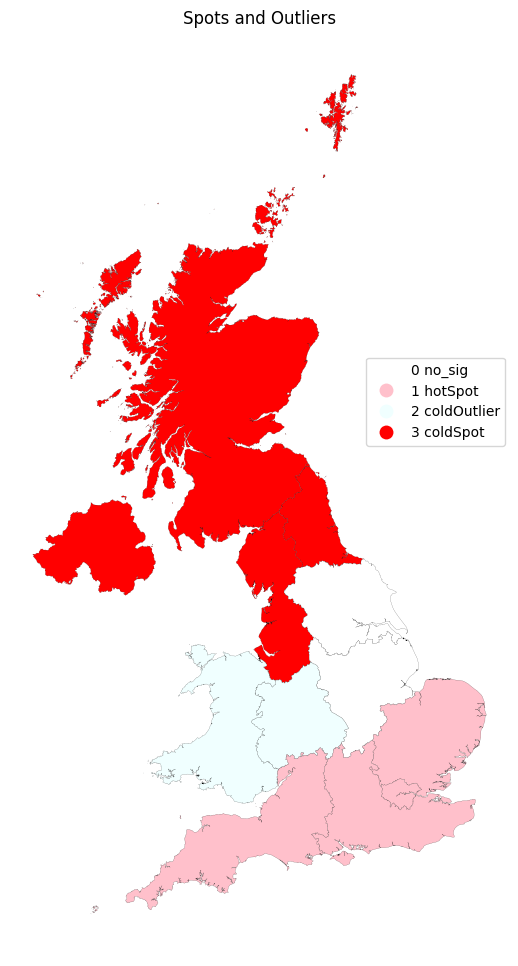

In [224]:
f, ax = plt.subplots(1, figsize=(12,12))

plt.title('Spots and Outliers')

datadisMap.plot(column='LE_quadrant_names',
                categorical=True,
                cmap=myColMap,
                linewidth=0.1,
                edgecolor='k',
                legend=True,
                legend_kwds={'loc': 'center left',
                             'bbox_to_anchor': (0.7, 0.6)},
                ax=ax)
ax.set_axis_off()
plt.show()

##Exercise 9

In [225]:
selected_variables = ['shdi',
                     'healthindex',
                     'lifexp']

<Axes: >

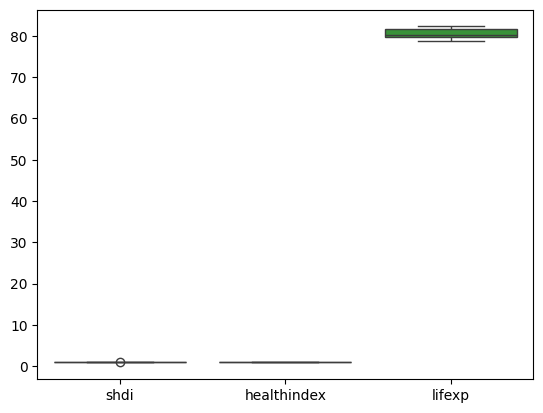

In [231]:
import seaborn as sea
sea.boxplot(datadisMap[selected_variables])

In [232]:
datadisMap[selected_variables].corr()

shdi  healthindex    lifexp
shdi         1.000000     0.690574  0.691550
healthindex  0.690574     1.000000  0.999968
lifexp       0.691550     0.999968  1.000000

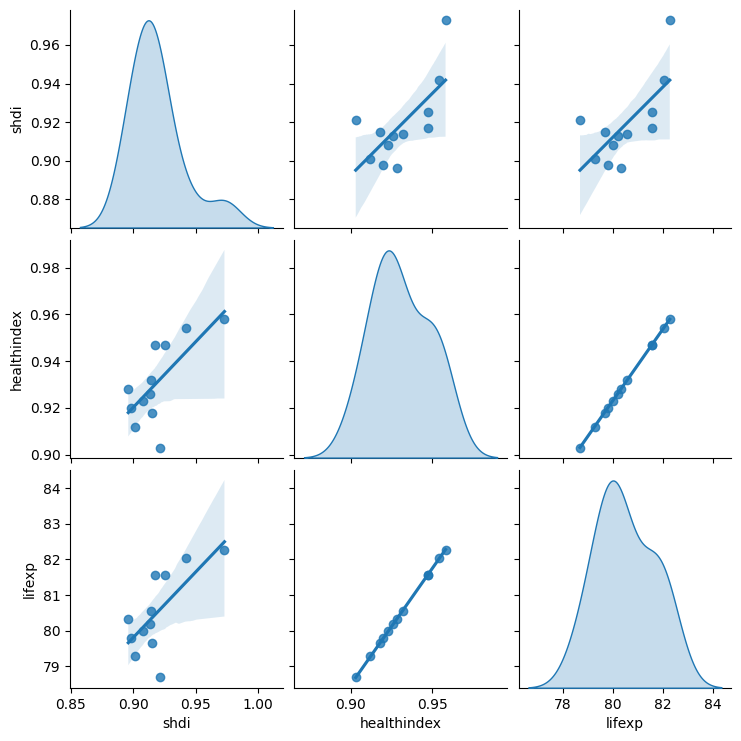

In [233]:
sea.pairplot(
    datadisMap[selected_variables], kind="reg", diag_kind="kde"
)